In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import datasets
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB

In [2]:
storedata = pd.read_csv(r'stores.csv')
featuresdata = pd.read_csv(r'features.csv')
traindata = pd.read_csv(r'train.csv')

In [3]:
storedata

,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875
5,6,A,202505
6,7,B,70713
7,8,A,155078
8,9,B,125833
9,10,B,126512


In [4]:
featuresdata.head(5)

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,2010-03-05,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False


In [5]:
traindata.head(5)

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False


In [6]:
data = pd.merge(featuresdata, traindata, on = ['Store','Date'] ,how= 'inner')

In [7]:
data = pd.merge(data,storedata , on = ['Store'],how = 'inner')

In [8]:
data.drop(columns=['IsHoliday_x'],inplace=True)

In [9]:
data.rename(columns={'IsHoliday_y':'IsHoliday'}, inplace=True)

In [10]:
# data.MarkDown2.unique()
data

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Dept,Weekly_Sales,IsHoliday,Type,Size
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,1,24924.50,False,A,151315
1,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,2,50605.27,False,A,151315
2,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,3,13740.12,False,A,151315
3,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,4,39954.04,False,A,151315
4,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,5,32229.38,False,A,151315
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421565,45,2012-10-26,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,93,2487.80,False,B,118221
421566,45,2012-10-26,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,94,5203.31,False,B,118221
421567,45,2012-10-26,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,95,56017.47,False,B,118221
421568,45,2012-10-26,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,97,6817.48,False,B,118221


In [11]:
c = data.columns
c.to_list()

['Store',
 'Date',
 'Temperature',
 'Fuel_Price',
 'MarkDown1',
 'MarkDown2',
 'MarkDown3',
 'MarkDown4',
 'MarkDown5',
 'CPI',
 'Unemployment',
 'Dept',
 'Weekly_Sales',
 'IsHoliday',
 'Type',
 'Size']

In [12]:
data['Date'] = data["Date"].apply(lambda x : x[2:])

In [13]:
data['Date'] = pd.to_datetime(data['Date'],format='%y-%m-%d')
data

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Dept,Weekly_Sales,IsHoliday,Type,Size
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,1,24924.50,False,A,151315
1,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,2,50605.27,False,A,151315
2,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,3,13740.12,False,A,151315
3,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,4,39954.04,False,A,151315
4,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,5,32229.38,False,A,151315
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421565,45,2012-10-26,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,93,2487.80,False,B,118221
421566,45,2012-10-26,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,94,5203.31,False,B,118221
421567,45,2012-10-26,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,95,56017.47,False,B,118221
421568,45,2012-10-26,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,97,6817.48,False,B,118221


In [14]:
data['year'] = data['Date'].dt.year
data['month'] = data['Date'].dt.month

In [15]:
data

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Dept,Weekly_Sales,IsHoliday,Type,Size,year,month
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,1,24924.50,False,A,151315,2010,2
1,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,2,50605.27,False,A,151315,2010,2
2,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,3,13740.12,False,A,151315,2010,2
3,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,4,39954.04,False,A,151315,2010,2
4,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,5,32229.38,False,A,151315,2010,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421565,45,2012-10-26,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,93,2487.80,False,B,118221,2012,10
421566,45,2012-10-26,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,94,5203.31,False,B,118221,2012,10
421567,45,2012-10-26,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,95,56017.47,False,B,118221,2012,10
421568,45,2012-10-26,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,97,6817.48,False,B,118221,2012,10


In [16]:
# data2 = data.drop(columns= ['MarkDown1','MarkDown2','MarkDown3','MarkDown4','MarkDown5','Date'])
# data2 = data.drop(columns= ['Date'])
data2 = data.copy()

In [17]:
data2.duplicated().any()

False

In [18]:
### data2['Temperature'] = data2['Temperature'].astype(int)
data2['CPI'] = data2['CPI'].astype(int)
data2['Weekly_Sales'] = data2['Weekly_Sales'].astype(int)
data2['Unemployment'] = data2['Unemployment'].astype(int)
data2['Fuel_Price'] = data2['Fuel_Price'].astype(int)

data2


,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Dept,Weekly_Sales,IsHoliday,Type,Size,year,month
0,1,2010-02-05,42.31,2,NaN,NaN,NaN,NaN,NaN,211,8,1,24924,False,A,151315,2010,2
1,1,2010-02-05,42.31,2,NaN,NaN,NaN,NaN,NaN,211,8,2,50605,False,A,151315,2010,2
2,1,2010-02-05,42.31,2,NaN,NaN,NaN,NaN,NaN,211,8,3,13740,False,A,151315,2010,2
3,1,2010-02-05,42.31,2,NaN,NaN,NaN,NaN,NaN,211,8,4,39954,False,A,151315,2010,2
4,1,2010-02-05,42.31,2,NaN,NaN,NaN,NaN,NaN,211,8,5,32229,False,A,151315,2010,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421565,45,2012-10-26,58.85,3,4018.91,58.08,100.0,211.94,858.33,192,8,93,2487,False,B,118221,2012,10
421566,45,2012-10-26,58.85,3,4018.91,58.08,100.0,211.94,858.33,192,8,94,5203,False,B,118221,2012,10
421567,45,2012-10-26,58.85,3,4018.91,58.08,100.0,211.94,858.33,192,8,95,56017,False,B,118221,2012,10
421568,45,2012-10-26,58.85,3,4018.91,58.08,100.0,211.94,858.33,192,8,97,6817,False,B,118221,2012,10


In [19]:
# dropping -ve values of weekly sales data form dataset 
data2 = data2.loc[data2['Weekly_Sales']>0]

In [20]:
data2

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Dept,Weekly_Sales,IsHoliday,Type,Size,year,month
0,1,2010-02-05,42.31,2,NaN,NaN,NaN,NaN,NaN,211,8,1,24924,False,A,151315,2010,2
1,1,2010-02-05,42.31,2,NaN,NaN,NaN,NaN,NaN,211,8,2,50605,False,A,151315,2010,2
2,1,2010-02-05,42.31,2,NaN,NaN,NaN,NaN,NaN,211,8,3,13740,False,A,151315,2010,2
3,1,2010-02-05,42.31,2,NaN,NaN,NaN,NaN,NaN,211,8,4,39954,False,A,151315,2010,2
4,1,2010-02-05,42.31,2,NaN,NaN,NaN,NaN,NaN,211,8,5,32229,False,A,151315,2010,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421565,45,2012-10-26,58.85,3,4018.91,58.08,100.0,211.94,858.33,192,8,93,2487,False,B,118221,2012,10
421566,45,2012-10-26,58.85,3,4018.91,58.08,100.0,211.94,858.33,192,8,94,5203,False,B,118221,2012,10
421567,45,2012-10-26,58.85,3,4018.91,58.08,100.0,211.94,858.33,192,8,95,56017,False,B,118221,2012,10
421568,45,2012-10-26,58.85,3,4018.91,58.08,100.0,211.94,858.33,192,8,97,6817,False,B,118221,2012,10


# Effect of Temp 

<AxesSubplot: xlabel='Temperature'>

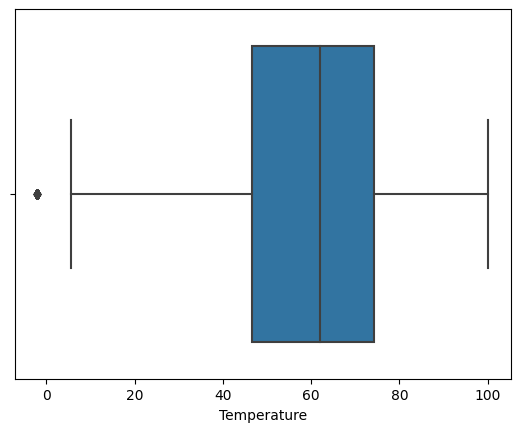

In [21]:
data2['Temperature'].unique().size
# sns.histplot(y = 'Weekly_Sales', x = 'Temperature', bins=[-2,3,8,13,18,23,28,33,38,43,48,53,58,63,68,73,78,83,88,93,100],data = data2)
# sns.scatterplot(y = 'Weekly_Sales', x = 'Temperature',data = data2)
sns.boxplot(x = 'Temperature', data  = data2)

<AxesSubplot: xlabel='Temperature'>

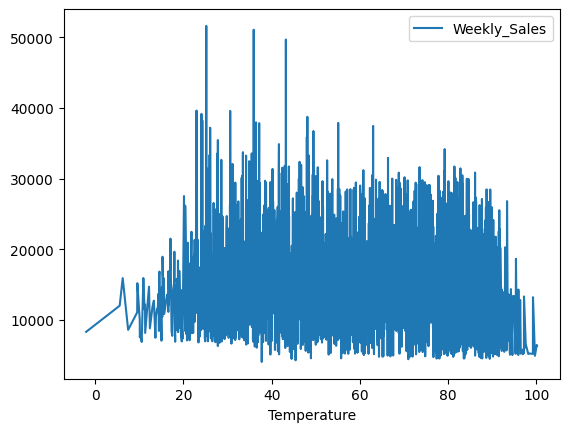

In [22]:
# sns.scatterplot(y = 'Weekly_Sales', x = 'Temperature',data = data2)
temp = pd.pivot_table(data2, values = "Weekly_Sales", index= "Temperature")
temp.plot()
# plt.ylim(0,70000)


In [23]:
(data2[data2['Temperature']<=18]['Weekly_Sales'].sum()/data2['Weekly_Sales'].sum())*100
# There is no pattern as such in temperature , only difference is on extreme low and high temp and it contribute 
# only 0.7% in the total sales,
# so we can ignore temperature, also taking temorature could cause overfittign for the model

0.7479537146713013

<AxesSubplot: xlabel='Temperature', ylabel='Weekly_Sales'>

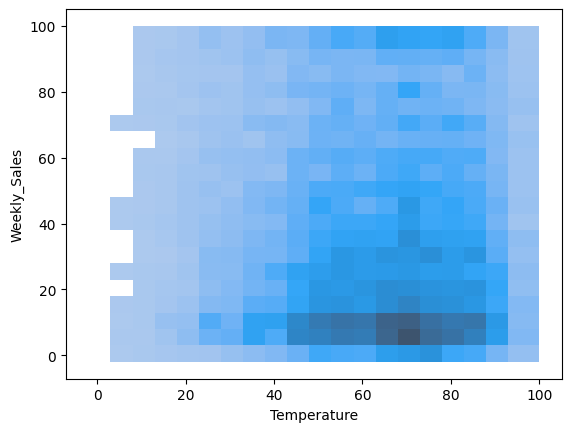

In [24]:
sns.histplot(y = 'Weekly_Sales', x = 'Temperature',bins=[-2,3,8,13,18,23,28,33,38,43,48,53,58,63,68,73,78,83,88,93,100],data = data2)

<AxesSubplot: xlabel='Weekly_Sales'>

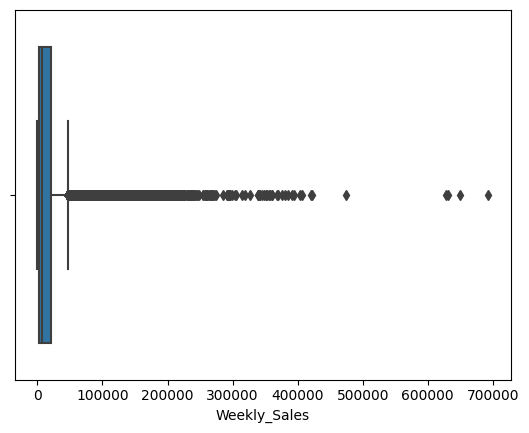

In [25]:
sns.boxplot(x = 'Weekly_Sales',data = data2)

In [26]:
# data2[data2['Weekly_Sales']==693099]
data2.Weekly_Sales.min()

1

In [27]:
data2.corr()

C:\Users\Parn\AppData\Local\Temp\ipykernel_21044\1981098430.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data2.corr()


,Store,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Dept,Weekly_Sales,IsHoliday,Size,year,month
Store,1.000000,-0.050265,0.047056,-0.119449,-0.034940,-0.031470,-0.009802,-0.027244,-0.211231,0.207313,0.024411,-0.085108,-0.000517,-0.182725,0.002666,0.000861
Temperature,-0.050265,1.000000,0.058076,-0.040371,-0.323736,-0.096716,-0.063984,-0.018183,0.183502,0.083923,0.004612,-0.001741,-0.155840,-0.058640,0.065226,0.235979
Fuel_Price,0.047056,0.058076,1.000000,-0.024454,-0.070560,-0.055843,-0.074299,-0.065196,-0.142106,0.004264,0.004495,0.001429,-0.024738,-0.007518,0.722305,-0.026666
MarkDown1,-0.119449,-0.040371,-0.024454,1.000000,0.024584,-0.108293,0.819384,0.160930,-0.054813,0.048721,-0.002641,0.085293,-0.035695,0.345523,0.141515,-0.176486
MarkDown2,-0.034940,-0.323736,-0.070560,0.024584,1.000000,-0.050261,-0.007611,-0.007305,-0.038960,0.022109,0.000521,0.024152,0.334389,0.109117,-0.221622,-0.005538
MarkDown3,-0.031470,-0.096716,-0.055843,-0.108293,-0.050261,1.000000,-0.071194,-0.026538,-0.023987,0.010456,0.002075,0.060114,0.428529,0.049030,-0.319383,0.188077
MarkDown4,-0.009802,-0.063984,-0.074299,0.819384,-0.007611,-0.071194,1.000000,0.108350,-0.049295,0.025484,0.004131,0.045264,-0.000454,0.168219,0.126544,-0.195009
MarkDown5,-0.027244,-0.018183,-0.065196,0.160930,-0.007305,-0.026538,0.108350,1.000000,0.059766,-0.013798,-0.000120,0.091116,-0.053777,0.305350,-0.129393,0.097889
CPI,-0.211231,0.183502,-0.142106,-0.054813,-0.038960,-0.023987,-0.049295,0.059766,1.000000,-0.295284,-0.007329,-0.021062,-0.001822,-0.003984,0.074692,0.005281
Unemployment,0.207313,0.083923,0.004264,0.048721,0.022109,0.010456,0.025484,-0.013798,-0.295284,1.000000,0.008130,-0.025680,0.013658,-0.065781,-0.249281,-0.009734


# Holiday Analysis

In [28]:
data2

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Dept,Weekly_Sales,IsHoliday,Type,Size,year,month
0,1,2010-02-05,42.31,2,NaN,NaN,NaN,NaN,NaN,211,8,1,24924,False,A,151315,2010,2
1,1,2010-02-05,42.31,2,NaN,NaN,NaN,NaN,NaN,211,8,2,50605,False,A,151315,2010,2
2,1,2010-02-05,42.31,2,NaN,NaN,NaN,NaN,NaN,211,8,3,13740,False,A,151315,2010,2
3,1,2010-02-05,42.31,2,NaN,NaN,NaN,NaN,NaN,211,8,4,39954,False,A,151315,2010,2
4,1,2010-02-05,42.31,2,NaN,NaN,NaN,NaN,NaN,211,8,5,32229,False,A,151315,2010,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421565,45,2012-10-26,58.85,3,4018.91,58.08,100.0,211.94,858.33,192,8,93,2487,False,B,118221,2012,10
421566,45,2012-10-26,58.85,3,4018.91,58.08,100.0,211.94,858.33,192,8,94,5203,False,B,118221,2012,10
421567,45,2012-10-26,58.85,3,4018.91,58.08,100.0,211.94,858.33,192,8,95,56017,False,B,118221,2012,10
421568,45,2012-10-26,58.85,3,4018.91,58.08,100.0,211.94,858.33,192,8,97,6817,False,B,118221,2012,10


<AxesSubplot: xlabel='IsHoliday', ylabel='Weekly_Sales'>

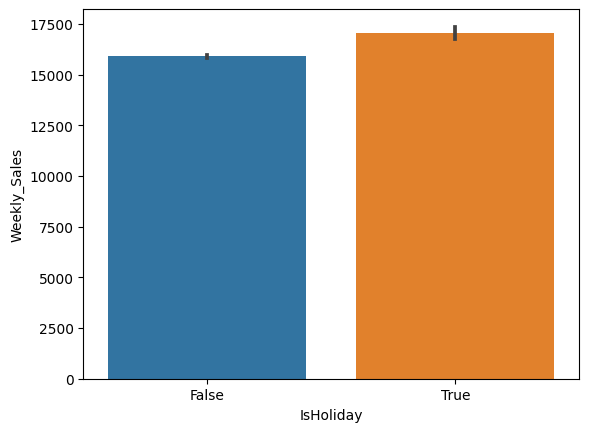

In [29]:
sns.barplot(x='IsHoliday', y = 'Weekly_Sales', data = data)

In [30]:
# When there is a holliday in a week there is more sales , do we can analyse Holidays in more detail sice it is profitable

data[data['IsHoliday']==True]['Date'].unique()


# '2010-09-10T00:00:00.000000000',
#        '2010-11-26T00:00:00.000000000', '2010-12-31T00:00:00.000000000', '2011-09-09T00:00:00.000000000',
#        '2011-11-25T00:00:00.000000000', '2011-12-30T00:00:00.000000000', '2012-09-07T00:00:00.000000000']'

array(['2010-02-12T00:00:00.000000000', '2010-09-10T00:00:00.000000000',
       '2010-11-26T00:00:00.000000000', '2010-12-31T00:00:00.000000000',
       '2011-02-11T00:00:00.000000000', '2011-09-09T00:00:00.000000000',
       '2011-11-25T00:00:00.000000000', '2011-12-30T00:00:00.000000000',
       '2012-02-10T00:00:00.000000000', '2012-09-07T00:00:00.000000000'],
      dtype='datetime64[ns]')

In [31]:
# Super bowl and Presidents day dates
data.loc[(data['Date'] == '2010-02-12')|(data['Date'] == '2011-02-11')|(data['Date'] == '2012-02-10'),'Super_Bowl,President day'] = True
data.loc[(data['Date'] != '2010-02-12')&(data['Date'] != '2011-02-11')&(data['Date'] != '2012-02-10'),'Super_Bowl,President day'] = False

# Labor day dates in train set
data.loc[(data['Date'] == '2010-09-10')|(data['Date'] == '2011-09-09')|(data['Date'] == '2012-09-07'),'Labor_Day'] = True
data.loc[(data['Date'] != '2010-09-10')&(data['Date'] != '2011-09-09')&(data['Date'] != '2012-09-07'),'Labor_Day'] = False

# Thanksgiving day dates in train set
data.loc[(data['Date'] == '2010-11-26')|(data['Date'] == '2011-11-25'),'Thanksgiving day'] = True
data.loc[(data['Date'] != '2010-11-26')&(data['Date'] != '2011-11-25'),'Thanksgiving day'] = False

#Christmas dates in train set
data.loc[(data['Date'] == '2010-12-31')|(data['Date'] == '2011-12-30'),'Christmas day'] = True
data.loc[(data['Date'] != '2010-12-31')&(data['Date'] != '2011-12-30'),'Christmas day'] = False

In [32]:
data

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,...,Weekly_Sales,IsHoliday,Type,Size,year,month,"Super_Bowl,President day",Labor_Day,Thanksgiving day,Christmas day
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,...,24924.50,False,A,151315,2010,2,False,False,False,False
1,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,...,50605.27,False,A,151315,2010,2,False,False,False,False
2,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,...,13740.12,False,A,151315,2010,2,False,False,False,False
3,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,...,39954.04,False,A,151315,2010,2,False,False,False,False
4,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,...,32229.38,False,A,151315,2010,2,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421565,45,2012-10-26,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,...,2487.80,False,B,118221,2012,10,False,False,False,False
421566,45,2012-10-26,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,...,5203.31,False,B,118221,2012,10,False,False,False,False
421567,45,2012-10-26,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,...,56017.47,False,B,118221,2012,10,False,False,False,False
421568,45,2012-10-26,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,...,6817.48,False,B,118221,2012,10,False,False,False,False


<AxesSubplot: xlabel='Super_Bowl,President day', ylabel='Weekly_Sales'>

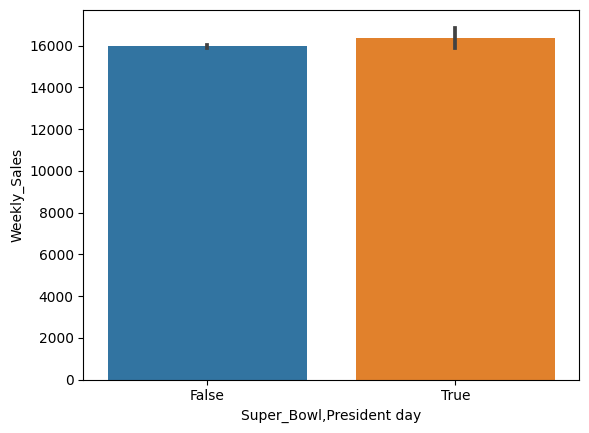

In [33]:
sns.barplot(x = 'Super_Bowl,President day', y = 'Weekly_Sales', data  = data)

<AxesSubplot: xlabel='Labor_Day', ylabel='Weekly_Sales'>

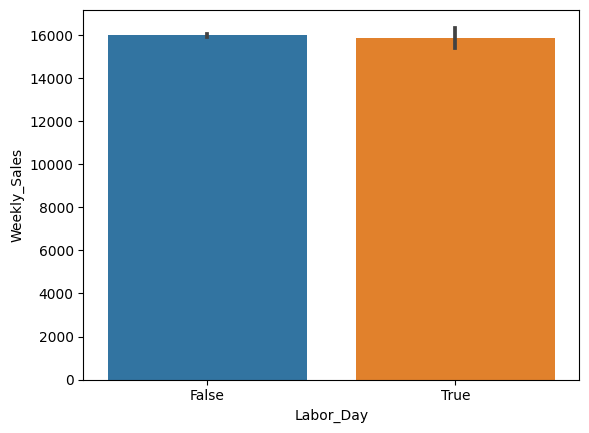

In [34]:
sns.barplot(x = 'Labor_Day', y = 'Weekly_Sales', data  = data)

<AxesSubplot: xlabel='Thanksgiving day', ylabel='Weekly_Sales'>

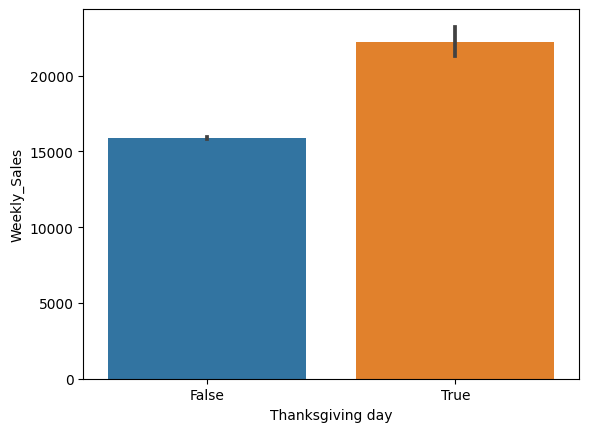

In [35]:
sns.barplot(x = 'Thanksgiving day', y = 'Weekly_Sales', data  = data)

<AxesSubplot: xlabel='Christmas day', ylabel='Weekly_Sales'>

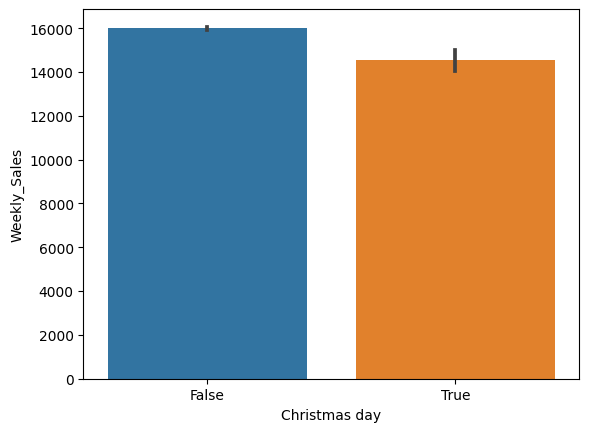

In [36]:
sns.barplot(x = 'Christmas day', y = 'Weekly_Sales', data  = data)

+ve effect of holiday in Super_Bowl day and more sifnificant effect on Thanks giving day 

# Type relation with holiday

In [37]:
Ctype = data.groupby(['Christmas day','Type'])['Weekly_Sales'].mean().reset_index()
Stype = data.groupby(['Super_Bowl,President day','Type'])['Weekly_Sales'].mean().reset_index()
Ttype = data.groupby(['Thanksgiving day','Type'])['Weekly_Sales'].mean().reset_index()
Ltype = data.groupby(['Labor_Day','Type'])['Weekly_Sales'].mean().reset_index()

In [38]:
Ctype

,Christmas day,Type,Weekly_Sales
0,False,A,20126.297990
1,False,B,12249.152357
2,False,C,9541.691864
3,True,A,18231.031306
4,True,B,11394.051524
5,True,C,7963.228980


<AxesSubplot: xlabel='Type', ylabel='Weekly_Sales'>

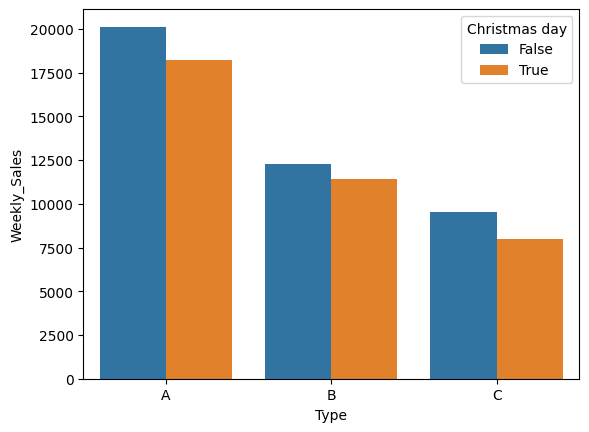

In [39]:
sns.barplot(y = 'Weekly_Sales', x = 'Type', hue = 'Christmas day', data = Ctype)

<AxesSubplot: xlabel='Type', ylabel='Weekly_Sales'>

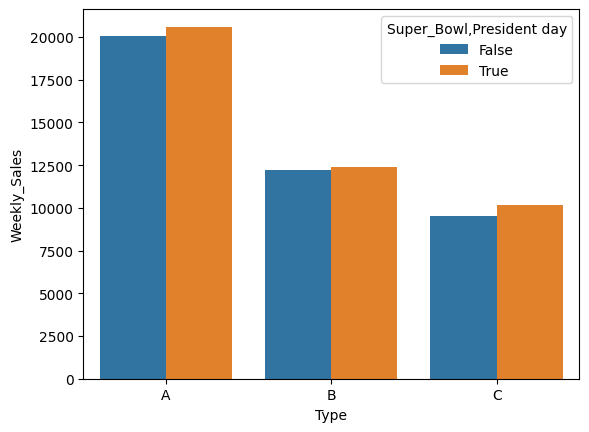

In [40]:
sns.barplot(y = 'Weekly_Sales', x = 'Type', hue = 'Super_Bowl,President day', data = Stype)


<AxesSubplot: xlabel='Type', ylabel='Weekly_Sales'>

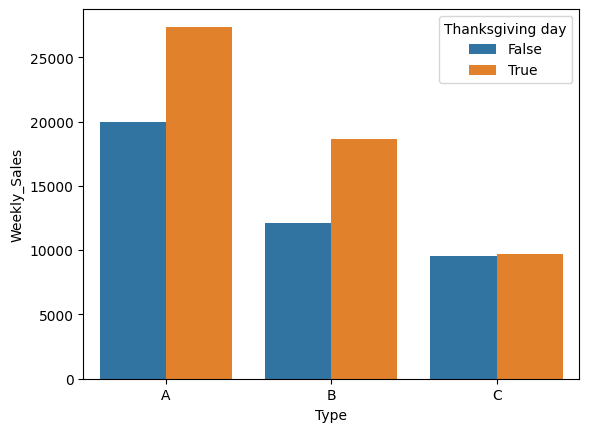

In [41]:
sns.barplot(y = 'Weekly_Sales', x = 'Type', hue = 'Thanksgiving day', data = Ttype)

<AxesSubplot: xlabel='Type', ylabel='Weekly_Sales'>

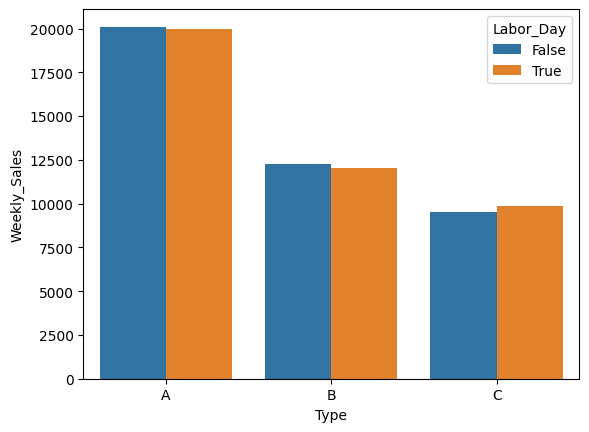

In [42]:
sns.barplot(y = 'Weekly_Sales', x = 'Type', hue = 'Labor_Day', data = Ltype)

In [43]:
typed = storedata.groupby('Type').size().reset_index()
# plt.pie(typed)
typedprcnt = (typed[0]/typed[0].sum())*100
typedprcnt

0    48.888889
1    37.777778
2    13.333333
Name: 0, dtype: float64

([<matplotlib.patches.Wedge at 0x1fb9bad2d40>,
 [Text(-0.736043741830004, -0.8174592406431568, 'A'),
  Text(1.0049001169741245, 0.44741005230704334, 'B'),
  Text(-0.48220791588714246, 0.9886736194800481, 'C')],
 [Text(-0.4014784046345476, -0.44588685853263094, '48.9%'),
  Text(0.5481273365313405, 0.2440418467129327, '37.8%'),
  Text(-0.26302249957480495, 0.5392765197163898, '13.3%')])

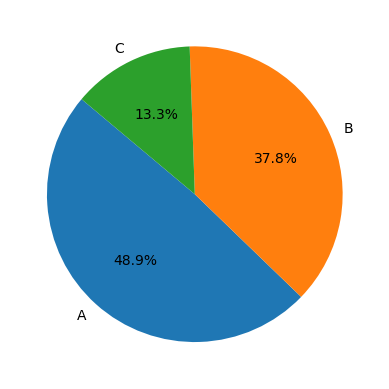

In [44]:
plt.pie(typedprcnt, labels=typed['Type'], autopct='%1.1f%%', startangle=140)

# Size-Type relation

<AxesSubplot: xlabel='Type', ylabel='Size'>

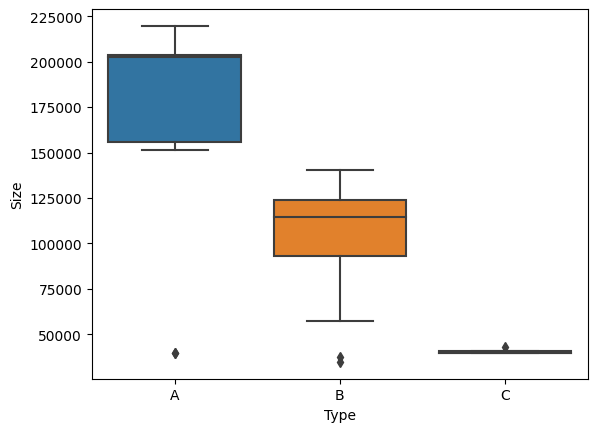

In [45]:
storedata
sns.boxplot(x = 'Type', y = 'Size', data = storedata)

# Effect of Markdown on sales 

In [46]:
data.fillna(value= 0, inplace = True)
data

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,...,Weekly_Sales,IsHoliday,Type,Size,year,month,"Super_Bowl,President day",Labor_Day,Thanksgiving day,Christmas day
0,1,2010-02-05,42.31,2.572,0.00,0.00,0.0,0.00,0.00,211.096358,...,24924.50,False,A,151315,2010,2,False,False,False,False
1,1,2010-02-05,42.31,2.572,0.00,0.00,0.0,0.00,0.00,211.096358,...,50605.27,False,A,151315,2010,2,False,False,False,False
2,1,2010-02-05,42.31,2.572,0.00,0.00,0.0,0.00,0.00,211.096358,...,13740.12,False,A,151315,2010,2,False,False,False,False
3,1,2010-02-05,42.31,2.572,0.00,0.00,0.0,0.00,0.00,211.096358,...,39954.04,False,A,151315,2010,2,False,False,False,False
4,1,2010-02-05,42.31,2.572,0.00,0.00,0.0,0.00,0.00,211.096358,...,32229.38,False,A,151315,2010,2,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421565,45,2012-10-26,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,...,2487.80,False,B,118221,2012,10,False,False,False,False
421566,45,2012-10-26,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,...,5203.31,False,B,118221,2012,10,False,False,False,False
421567,45,2012-10-26,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,...,56017.47,False,B,118221,2012,10,False,False,False,False
421568,45,2012-10-26,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,...,6817.48,False,B,118221,2012,10,False,False,False,False


In [47]:
md1 = data[data['MarkDown1']==0]['Weekly_Sales'].mean()
md2 = data[data['MarkDown2']==0]['Weekly_Sales'].mean()
md3 = data[data['MarkDown3']==0]['Weekly_Sales'].mean()
md4 = data[data['MarkDown4']==0]['Weekly_Sales'].mean()
md5 = data[data['MarkDown5']==0]['Weekly_Sales'].mean()
# 15700
md1 = data[data['MarkDown1']!=0]['Weekly_Sales'].mean()
md2 = data[data['MarkDown2']!=0]['Weekly_Sales'].mean()
md3 = data[data['MarkDown3']!=0]['Weekly_Sales'].mean()
md4 = data[data['MarkDown4']!=0]['Weekly_Sales'].mean()
md5 = data[data['MarkDown5']!=0]['Weekly_Sales'].mean()
print(md1,md2,md3,md4,md5)

16215.489727371067 17052.515168451293 16738.20826679998 17026.38032096735 16177.015243805801


# Department and Store analysis 

Text(0, 0.5, 'Weekly Sales ')

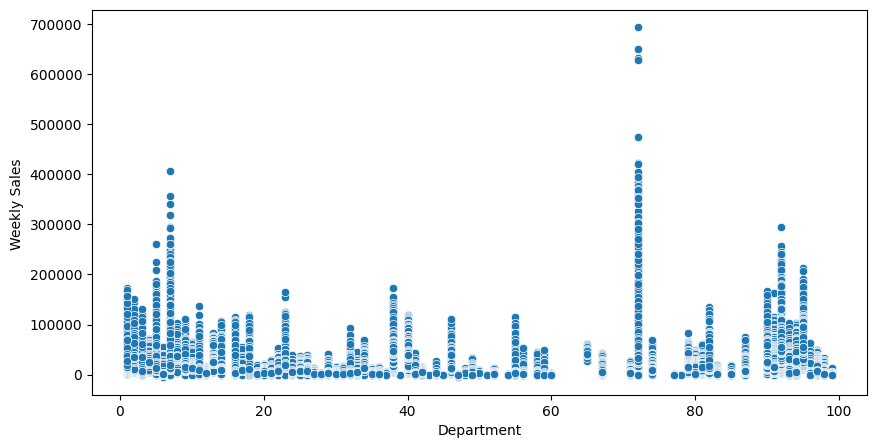

In [48]:
plt.figure(figsize=(10,5))
sns.scatterplot(x = 'Dept', y = 'Weekly_Sales', data = data )
# plt.legend()
plt.xlabel('Department')
plt.ylabel('Weekly Sales ')

In [49]:
pd.set_option('display.max_columns', None)
# data[data['Weekly_Sales']== data['Weekly_Sales'].max()]
g = data['Weekly_Sales'].nlargest(6)
g.size
data[data['Weekly_Sales']==g.iloc[4]]

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Dept,Weekly_Sales,IsHoliday,Type,Size,year,month,"Super_Bowl,President day",Labor_Day,Thanksgiving day,Christmas day
131088,14,2010-11-26,46.15,3.039,0.0,0.0,0.0,0.0,0.0,182.783277,8.724,72,474330.1,True,A,200898,2010,11,False,False,True,False


<AxesSubplot: xlabel='Dept', ylabel='Weekly_Sales'>

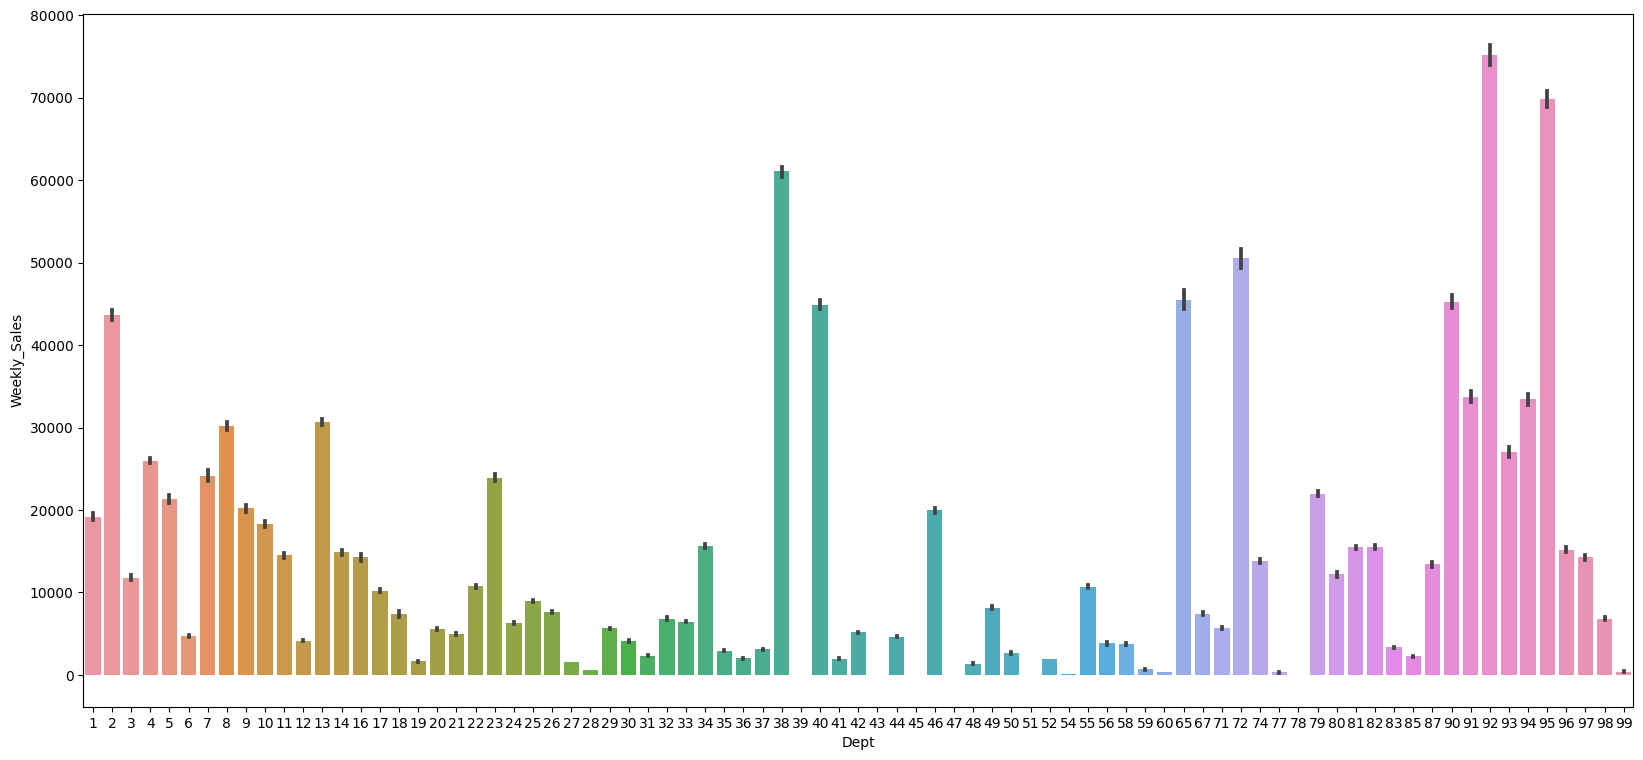

In [50]:
plt.figure(figsize = (20,9))
sns.barplot(x = data['Dept'], y = data['Weekly_Sales'], data = data)

In [51]:
# department 92 have highest sales (barplot showing mean value),  department 72 could be a seasonal, highest sales on perticualr season 
# lets analysis it give to 3 sales are form department 72 type B and on Thanks giving day 

Text(0, 0.5, 'Weekly Sales ')

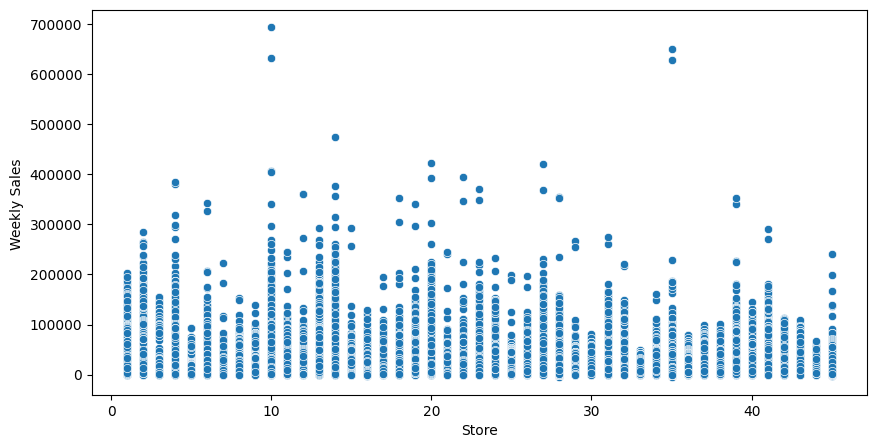

In [52]:
plt.figure(figsize=(10,5))
sns.scatterplot(x = 'Store', y = 'Weekly_Sales', data = data )
# plt.legend()
plt.xlabel('Store')
plt.ylabel('Weekly Sales ')

<AxesSubplot: xlabel='Store', ylabel='Weekly_Sales'>

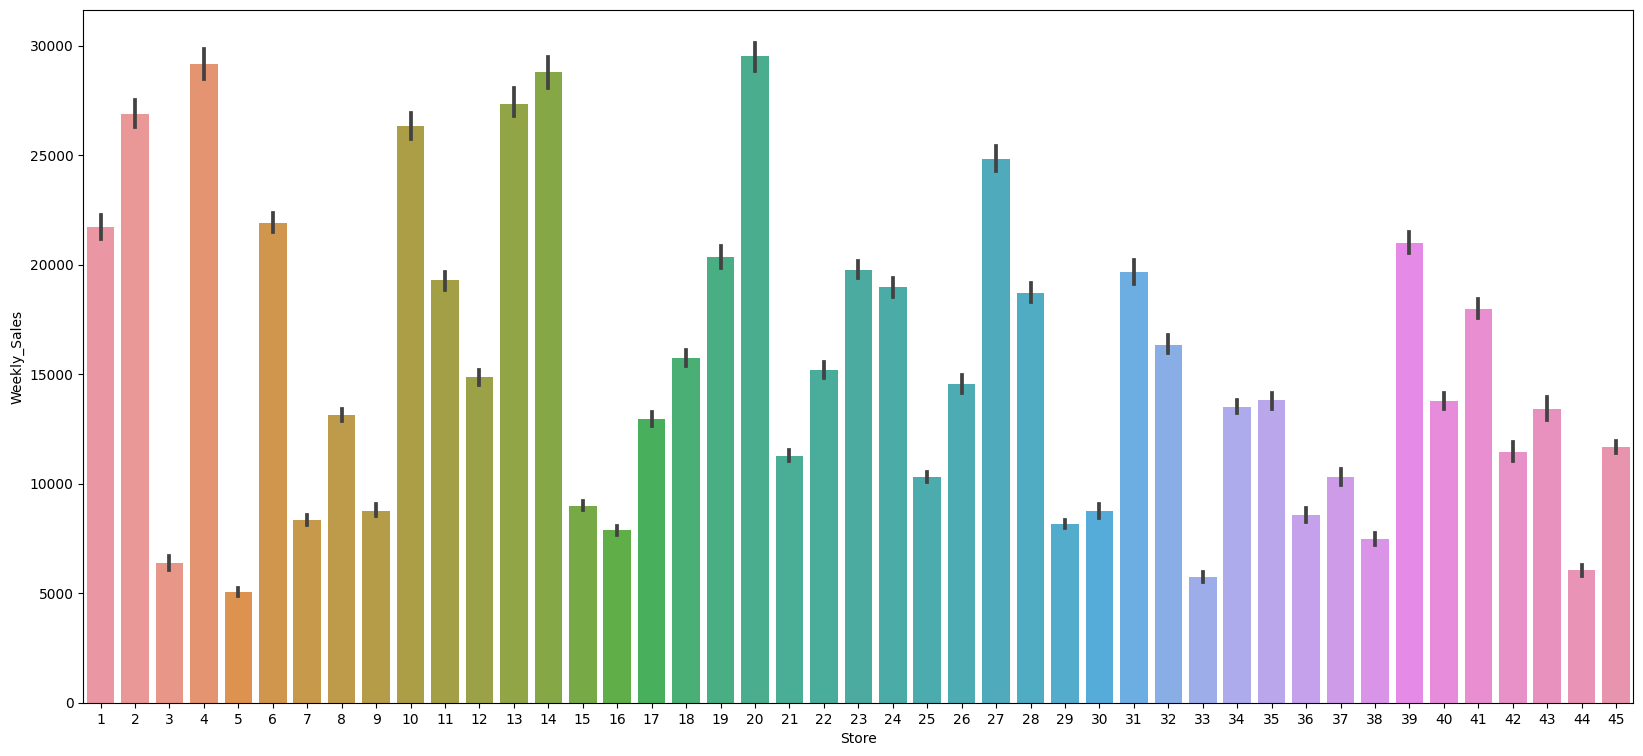

In [53]:
plt.figure(figsize = (20,9))
sns.barplot(x = data['Store'], y = data['Weekly_Sales'], data = data)

# year and month wise sales anlaysis

In [54]:
data2

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Dept,Weekly_Sales,IsHoliday,Type,Size,year,month
0,1,2010-02-05,42.31,2,NaN,NaN,NaN,NaN,NaN,211,8,1,24924,False,A,151315,2010,2
1,1,2010-02-05,42.31,2,NaN,NaN,NaN,NaN,NaN,211,8,2,50605,False,A,151315,2010,2
2,1,2010-02-05,42.31,2,NaN,NaN,NaN,NaN,NaN,211,8,3,13740,False,A,151315,2010,2
3,1,2010-02-05,42.31,2,NaN,NaN,NaN,NaN,NaN,211,8,4,39954,False,A,151315,2010,2
4,1,2010-02-05,42.31,2,NaN,NaN,NaN,NaN,NaN,211,8,5,32229,False,A,151315,2010,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421565,45,2012-10-26,58.85,3,4018.91,58.08,100.0,211.94,858.33,192,8,93,2487,False,B,118221,2012,10
421566,45,2012-10-26,58.85,3,4018.91,58.08,100.0,211.94,858.33,192,8,94,5203,False,B,118221,2012,10
421567,45,2012-10-26,58.85,3,4018.91,58.08,100.0,211.94,858.33,192,8,95,56017,False,B,118221,2012,10
421568,45,2012-10-26,58.85,3,4018.91,58.08,100.0,211.94,858.33,192,8,97,6817,False,B,118221,2012,10


<AxesSubplot: xlabel='month'>

<Figure size 2000x900 with 0 Axes>

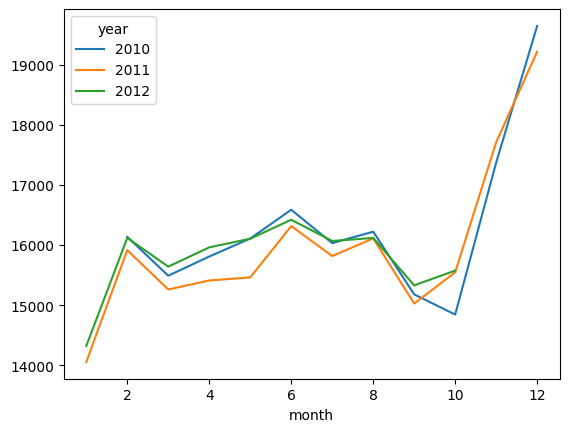

In [55]:
# plt.figure(figsize = (15,10))
plt.figure(figsize = (20,9))
monthly_sales = pd.pivot_table(data2, values = "Weekly_Sales", columns = "year", index = "month")

monthly_sales.plot()
# monthly_sales

<AxesSubplot: xlabel='month', ylabel='Weekly_Sales'>

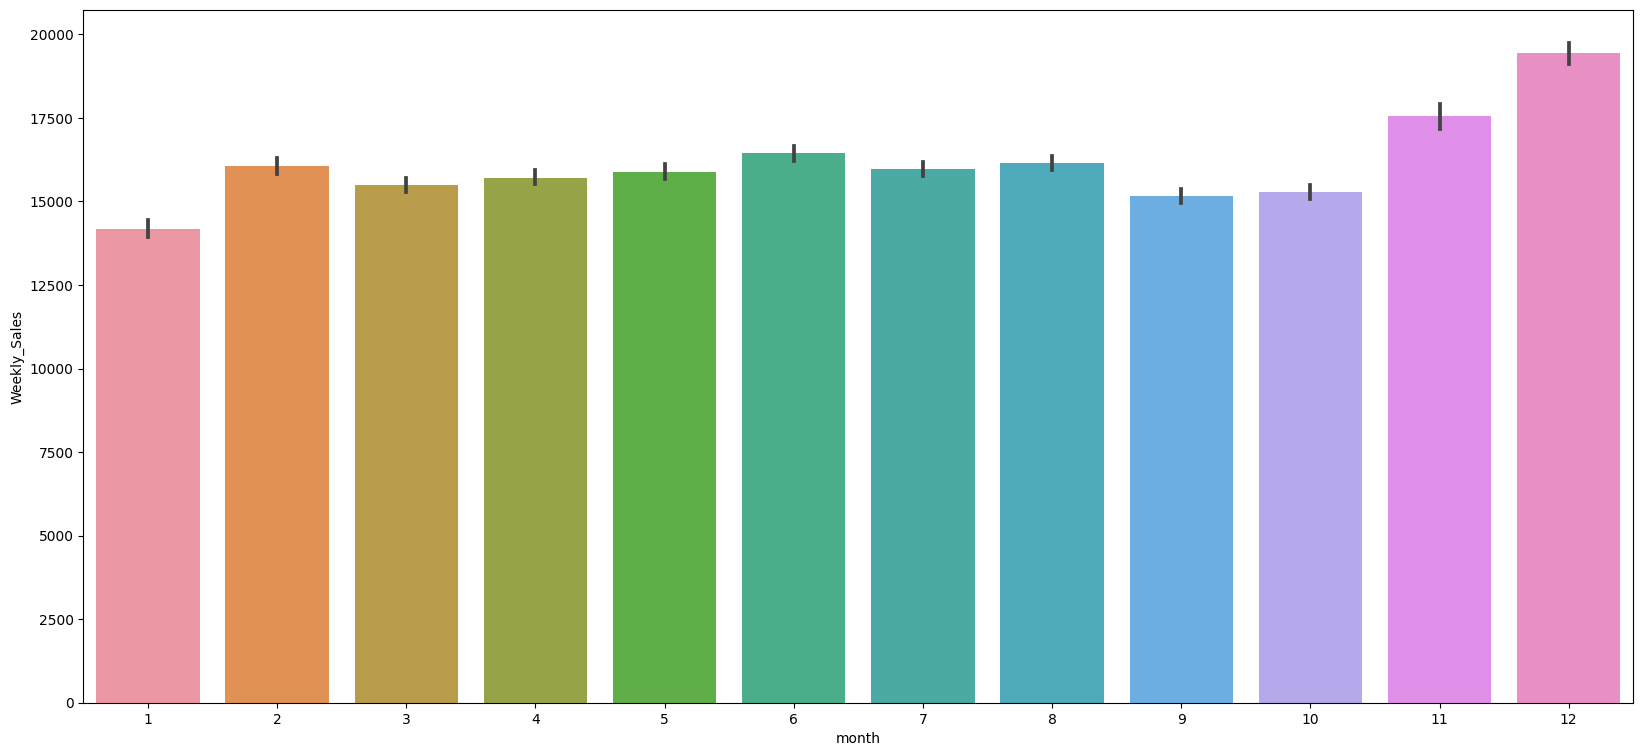

In [56]:
plt.figure(figsize = (20,9))
sns.barplot(y = 'Weekly_Sales', x = 'month',data =data2)

In [57]:
data2['week'] = data2['Date'].dt.week
data['week'] = data['Date'].dt.week

# data2

C:\Users\Parn\AppData\Local\Temp\ipykernel_21044\1255093100.py:1: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  data2['week'] = data2['Date'].dt.week
C:\Users\Parn\AppData\Local\Temp\ipykernel_21044\1255093100.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data2['week'] = data2['Date'].dt.week
C:\Users\Parn\AppData\Local\Temp\ipykernel_21044\1255093100.py:2: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  data['week'] = data['Date'].dt.week


In [58]:
data2.groupby('week')['Weekly_Sales'].mean().sort_values(ascending=False).head()

week
51    26471.420215
47    22280.369679
50    20481.386929
49    18740.790564
22    16896.798715
Name: Weekly_Sales, dtype: float64

In [59]:
f = data[data['Super_Bowl,President day']==True]
f
# christmas day week = 52
# thanks giving daya week = 47
# labour day week = 36
# Super_Bowl,President day = 6

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Dept,Weekly_Sales,IsHoliday,Type,Size,year,month,"Super_Bowl,President day",Labor_Day,Thanksgiving day,Christmas day,week
73,1,2010-02-12,38.51,2.548,0.0,0.00,0.00,0.00,0.00,211.242170,8.106,1,46039.49,True,A,151315,2010,2,True,False,False,False,6
74,1,2010-02-12,38.51,2.548,0.0,0.00,0.00,0.00,0.00,211.242170,8.106,2,44682.74,True,A,151315,2010,2,True,False,False,False,6
75,1,2010-02-12,38.51,2.548,0.0,0.00,0.00,0.00,0.00,211.242170,8.106,3,10887.84,True,A,151315,2010,2,True,False,False,False,6
76,1,2010-02-12,38.51,2.548,0.0,0.00,0.00,0.00,0.00,211.242170,8.106,4,35351.21,True,A,151315,2010,2,True,False,False,False,6
77,1,2010-02-12,38.51,2.548,0.0,0.00,0.00,0.00,0.00,211.242170,8.106,5,29620.81,True,A,151315,2010,2,True,False,False,False,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
419068,45,2012-02-10,37.00,3.640,15760.3,6113.95,5.43,5656.35,4685.58,189.707605,8.424,93,2166.02,True,B,118221,2012,2,True,False,False,False,6
419069,45,2012-02-10,37.00,3.640,15760.3,6113.95,5.43,5656.35,4685.58,189.707605,8.424,94,4479.20,True,B,118221,2012,2,True,False,False,False,6
419070,45,2012-02-10,37.00,3.640,15760.3,6113.95,5.43,5656.35,4685.58,189.707605,8.424,95,53291.16,True,B,118221,2012,2,True,False,False,False,6
419071,45,2012-02-10,37.00,3.640,15760.3,6113.95,5.43,5656.35,4685.58,189.707605,8.424,97,6638.91,True,B,118221,2012,2,True,False,False,False,6


<AxesSubplot: xlabel='week'>

<Figure size 2000x900 with 0 Axes>

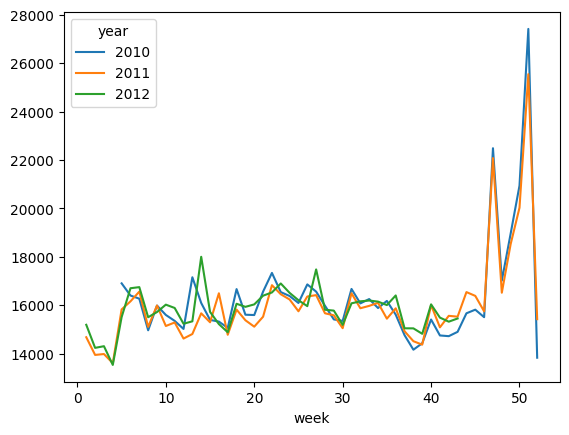

In [60]:
plt.figure(figsize = (20,9))
weekly_sales = pd.pivot_table(data2,columns='year', values= 'Weekly_Sales', index = 'week')
weekly_sales.plot()

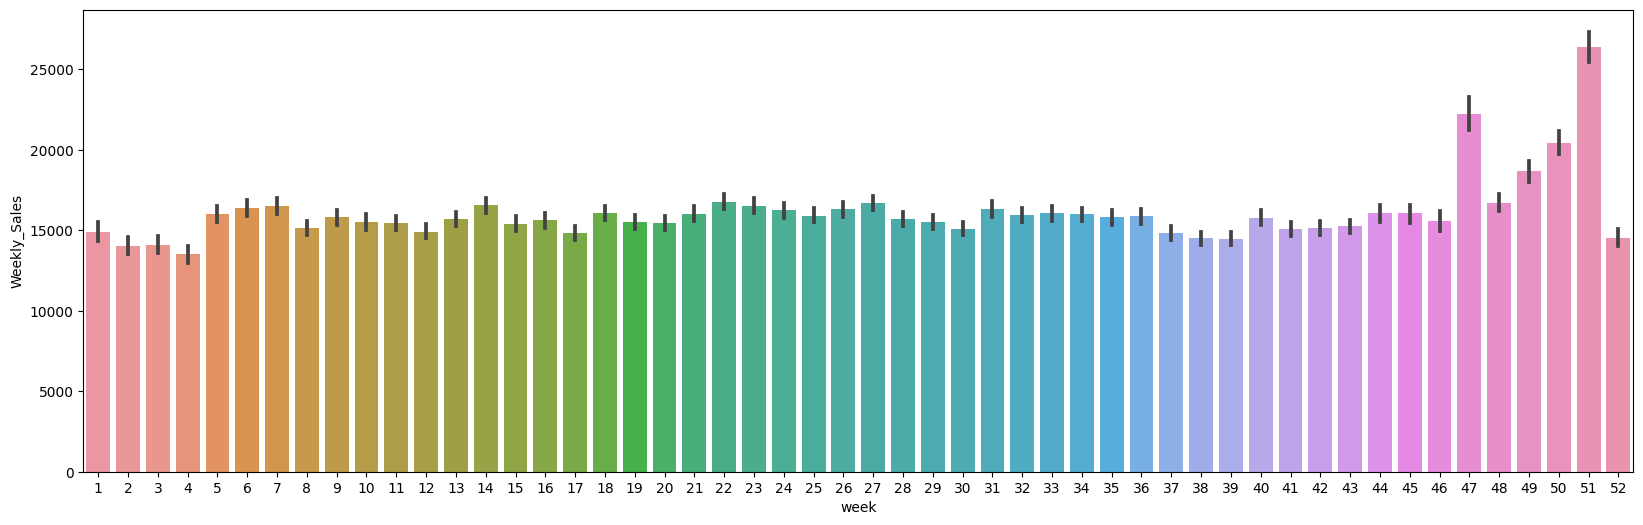

In [61]:
plt.figure(figsize=(20,6))
fig = sns.barplot(x='week', y='Weekly_Sales', data=data)

# Effect of temperature, cpi, fuel price, unemployment

In [62]:
data2 = data2.fillna(value = 0)


# Pridction Model

In [63]:
mldata = data2.copy()
mldata.drop(columns=['Date'], inplace = True)


## Encoding

In [64]:
type_group = {'A':1, 'B': 2, 'C': 3}  # changing A,B,C to 1-2-3
mldata['Type'] = mldata['Type'].replace(type_group)
mldata['IsHoliday'] = mldata['IsHoliday'].astype(bool).astype(int) # changing T,F to 0-1

<AxesSubplot: >

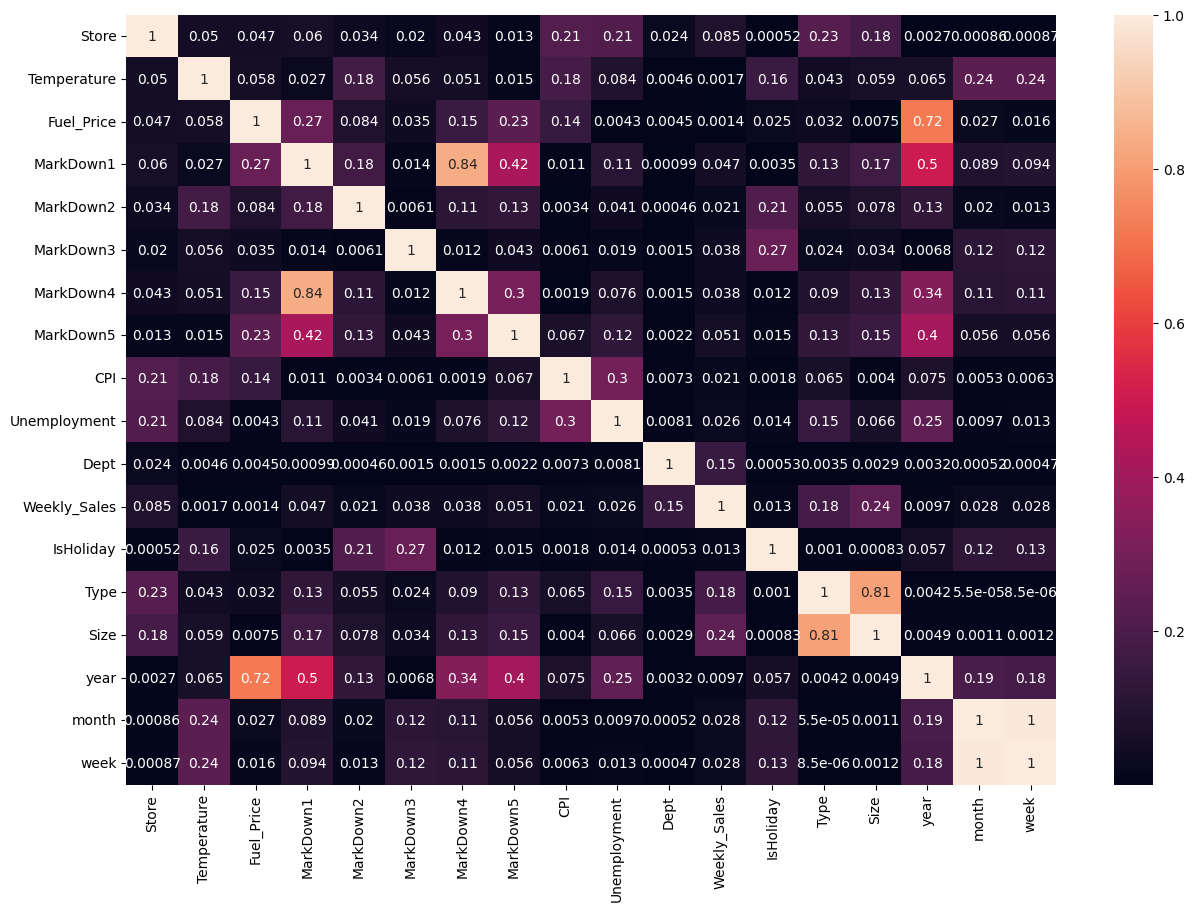

In [65]:

plt.figure(figsize = (15,10) )
# sns.heatmap(mldata.corr().abs(), annot = True,linewidths=2)
sns.heatmap(mldata.corr().abs(), annot = True)

In [71]:
finalMLdata = mldata.drop(columns = ['Temperature','CPI','MarkDown4','MarkDown5'])

In [67]:
# x = mldata.drop(columns=['Weekly_Sales'])
# y = mldata['Weekly_Sales']
# x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.3,random_state = 1)
# x_train.shape
# x_test.shape
# y_train.shape
# y_test.shape
# # dtc = DecisionTreeClassifier(random_state=0)
# # dtc.fit(x_train,y_train)
# # dtc_prediction = dtc.predict(x_test)
# # dtc_prediction

In [68]:
# svm_class = svm.SVC(kernel = 'rbf')
# svm_class

In [69]:
# svm_class.fit(x_train, y_train)

In [70]:
# svm_class.prediction = svm_class.predict(x_test)
# svm_class.prediction

## since data is too large, I am breaking it into 4 parts

In [73]:
finalMLdata

,Store,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,Unemployment,Dept,Weekly_Sales,IsHoliday,Type,Size,year,month,week
0,1,2,0.00,0.00,0.0,8,1,24924,0,1,151315,2010,2,5
1,1,2,0.00,0.00,0.0,8,2,50605,0,1,151315,2010,2,5
2,1,2,0.00,0.00,0.0,8,3,13740,0,1,151315,2010,2,5
3,1,2,0.00,0.00,0.0,8,4,39954,0,1,151315,2010,2,5
4,1,2,0.00,0.00,0.0,8,5,32229,0,1,151315,2010,2,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421565,45,3,4018.91,58.08,100.0,8,93,2487,0,2,118221,2012,10,43
421566,45,3,4018.91,58.08,100.0,8,94,5203,0,2,118221,2012,10,43
421567,45,3,4018.91,58.08,100.0,8,95,56017,0,2,118221,2012,10,43
421568,45,3,4018.91,58.08,100.0,8,97,6817,0,2,118221,2012,10,43


In [99]:
part1 = finalMLdata.iloc[1:20000]
part2 = finalMLdata.iloc[100000:200000]
part3 = finalMLdata.iloc[300000:]

In [102]:
x = finalMLdata.drop(columns=['Weekly_Sales'])
y = finalMLdata['Weekly_Sales']
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.3,random_state = 1)
x_train.shape
x_test.shape
y_train.shape
y_test.shape
dtc = DecisionTreeClassifier(random_state=0)
dtc.fit(x_train,y_train)
dtc_prediction = dtc.predict(x_test)
dtc_prediction

MemoryError: could not allocate 4067164160 bytes

In [101]:
accuracy_score(dtc_prediction, y_test)

0.0023333333333333335